##**BITS F464 - Semester 1 - MACHINE LEARNING**
--------------------------------------------------------------------------------

**ASSIGNMENT 2 – DECISION TREES AND SUPPORT VECTOR MACHINES**
--------------------------------------------------------------------------------
*-Please rename the file as "TeamXX_Assignment2.ipynb"*

***Team number:*** 6

---
(*In Title case, separated with commas*)
***Full names of all students in the team:*** Vidhi Chetan Shah, Isha Pargaonkar, Vipanchi Dixit, Shreenidhi Ramaswamy, Shramana Ghosh

---
(*Separated by commas*)
***Id number of all students in the team:*** 2021A3PS2645H, 2021A3PS2803H, 2021A3PS2983H, 2021A3PS0946H, 2021A7PS1834H


This assignment aims to identify the differences between three Machine Learning models.

# ***1. Preprocess and perform exploratory data analysis of the dataset obtained***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
data=pd.read_csv('communities.csv')
data.head()

,8,?,?.1,Lakewoodcity,1,0.19,0.33,0.02,0.9,0.12,...,0.12.2,0.26.1,0.2.1,0.06.3,0.04.2,0.9.1,0.5.2,0.32.2,0.14.3,0.2.2
0,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.0,?,0.67
1,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.0,?,0.43
2,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.0,?,0.12
3,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.0,?,0.03
4,6,?,?,SouthPasadenacity,1,0.02,0.28,0.06,0.54,1.00,...,0.01,0.58,0.10,?,?,?,?,0.0,?,0.14


In [ ]:
# we have used another csv file 'headings' to give feature names in our dataframe
headers = pd.read_csv('headings.csv', delim_whitespace = True)
df = pd.read_csv('communities.csv', names=headers['headings'])
df.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


In [ ]:
df.shape

(1994, 128)

In [ ]:
# removing non predictive features
column = ['state','county','community','communityname','fold']
df.drop(column, axis=1,inplace=True)
df.head()

print(df.shape) # we can see here that we have dropped 5 columns

(1994, 123)


# Handling Null values

In [ ]:
df = df.replace('?', np.nan)
miss_feat = df.columns[df.isnull().any()] # counting features that have missing values
print(miss_feat)
print(miss_feat.shape)

Index(['OtherPerCap', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps',
       'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop',
       'PolicReqPerOffic', 'PolicPerPop', 'RacialMatchCommPol',
       'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian',
       'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz',
       'PolicAveOTWorked', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr',
       'LemasGangUnitDeploy', 'PolicBudgPerPop'],
      dtype='object')
(23,)


Out of the 122 features to be used for prediction, 23 of them have missing values which we replaced with nan

In [ ]:
df[miss_feat[0:13]].describe()
# CHECK WHAT TOP AND FREQ MEAN!!

,OtherPerCap,LemasSwornFT,LemasSwFTPerPop,LemasSwFTFieldOps,LemasSwFTFieldPerPop,LemasTotalReq,LemasTotReqPerPop,PolicReqPerOffic,PolicPerPop,RacialMatchCommPol,PctPolicWhite,PctPolicBlack,PctPolicHisp
count,1993,319,319,319,319,319,319,319,319,319,319,319,319
unique,97,38,52,34,55,44,59,75,52,76,74,73,54
top,0,0.02,0.1,0.98,0.19,0.02,0.14,0.23,0.1,0.78,0.72,0,0
freq,129,80,19,81,17,55,23,15,19,12,11,23,72


In [ ]:
df[miss_feat[13:23]].describe()


,PctPolicAsian,PctPolicMinor,OfficAssgnDrugUnits,NumKindsDrugsSeiz,PolicAveOTWorked,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,PolicBudgPerPop
count,319,319,319,319,319,319,319,319,319,319
unique,50,72,30,15,77,63,38,72,3,51
top,0,0.07,0.03,0.57,0.19,0.02,0.02,0.74,0,0.12
freq,189,14,48,54,12,27,69,13,126,22


The attribute "OtherPerCap" has only 1 missing value whereas the other 21 attributes have many missing values and can be removed from the dataset.
The missing value in "OtherPerCap" can  be filled using the mean.

In [ ]:
df['OtherPerCap'].info()

# this feature is of object data type. We need to convert it to float data type.

<class 'pandas.core.series.Series'>
RangeIndex: 1994 entries, 0 to 1993
Series name: OtherPerCap
Non-Null Count  Dtype 
--------------  ----- 
1993 non-null   object
dtypes: object(1)
memory usage: 15.7+ KB


In [ ]:
# converting to float data type
df['OtherPerCap']=df['OtherPerCap'].astype(float)

In [ ]:
# filling in the missing value
mean=df['OtherPerCap'].mean()
df['OtherPerCap'] = df['OtherPerCap'].fillna(mean)
df[miss_feat[0:13]].describe()

,OtherPerCap
count,1994.000000
mean,0.284742
std,0.190960
min,0.000000
25%,0.170000
50%,0.250000
75%,0.360000
max,1.000000


In [ ]:
to_drop = ['LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps',
       'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop',
       'PolicReqPerOffic', 'PolicPerPop', 'RacialMatchCommPol',
       'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian',
       'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz',
       'PolicAveOTWorked', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr',
       'LemasGangUnitDeploy', 'PolicBudgPerPop']
df.drop(to_drop, axis=1, inplace=True)
df.shape

(1994, 101)

Now the null values have been handled and respective features have been dropped. The number of features has reduced from 127 to 100.

# Feature Selection and Correlation

In [ ]:
df.describe()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,0.336264,0.423164,...,0.215552,0.608892,0.535050,0.626424,0.651530,0.065231,0.232854,0.161685,0.094052,0.237979
std,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,0.143564,0.166505,0.179185,...,0.231134,0.204329,0.181352,0.200521,0.198221,0.109459,0.203092,0.229055,0.240328,0.232985
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,0.250000,0.300000,...,0.060000,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000,0.000000,0.070000
50%,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,0.290000,0.420000,...,0.130000,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000,0.000000,0.150000
75%,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,0.360000,0.530000,...,0.280000,0.777500,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000,0.000000,0.330000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


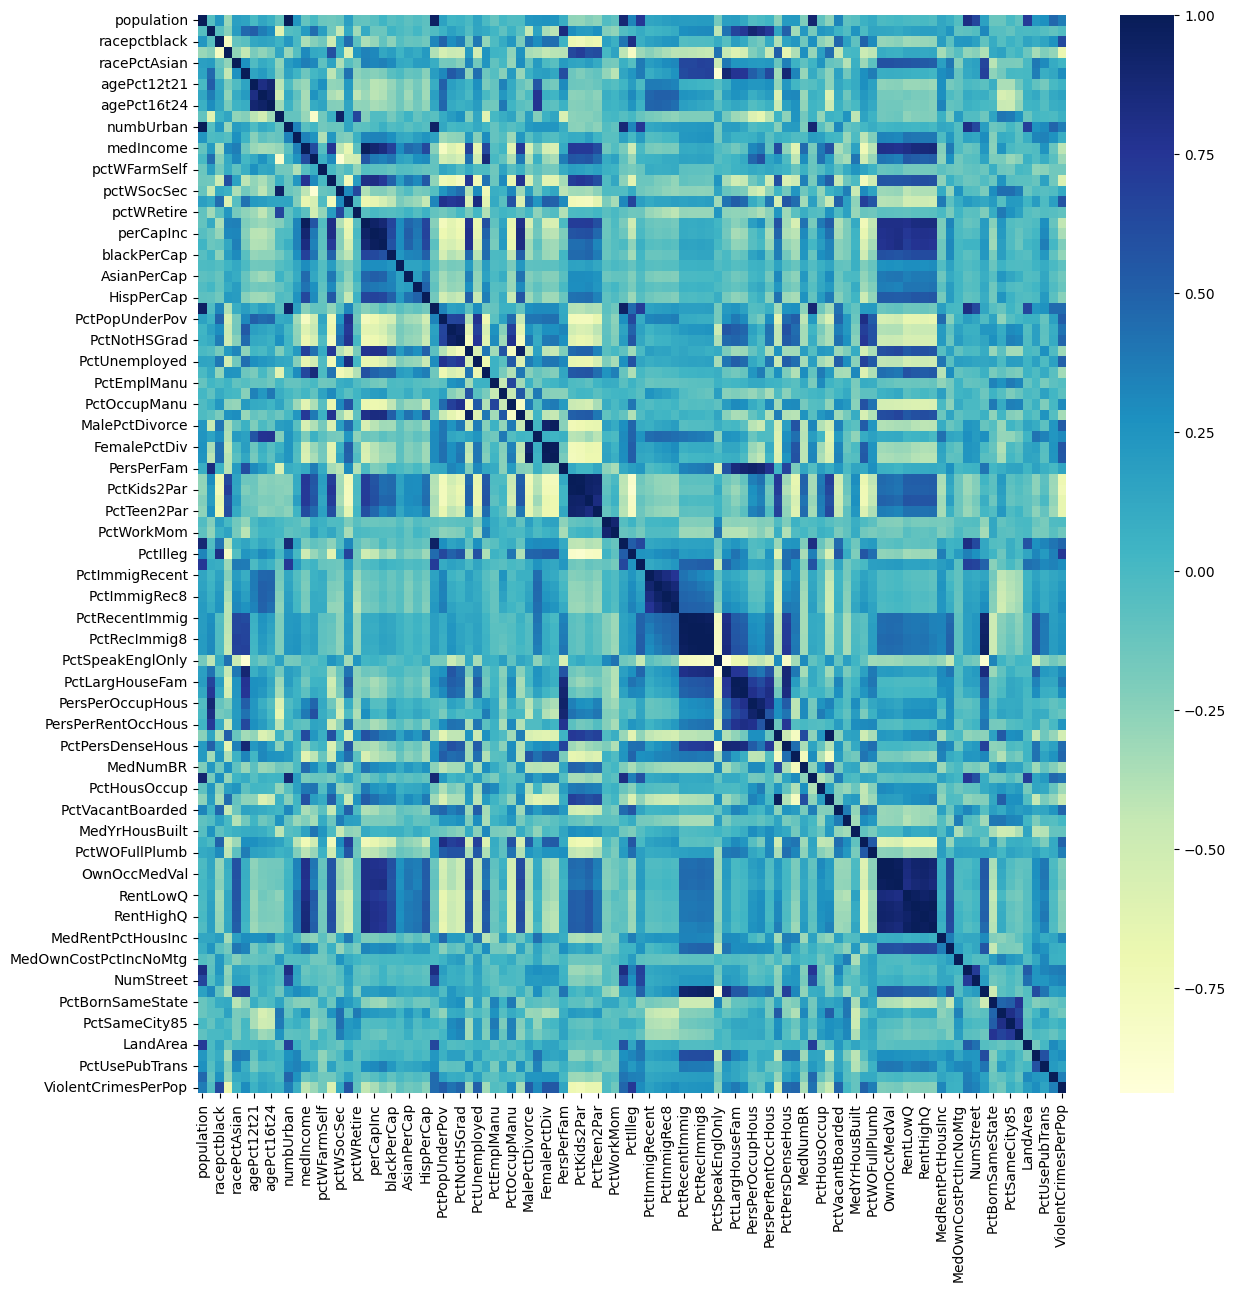

In [ ]:
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(),cmap='YlGnBu')
plt.show()

In [ ]:
corr_val = df.corr(method = 'pearson').round(4)
corr_val = corr_val.sort_values(by=['ViolentCrimesPerPop'])
corr_val['ViolentCrimesPerPop']
#sorted in ascending order of their correlation with 'ViolentCrimesPerPop' feature

PctKids2Par           -0.7384
PctFam2Par            -0.7067
racePctWhite          -0.6848
PctYoungKids2Par      -0.6661
PctTeen2Par           -0.6616
                        ...  
FemalePctDiv           0.5560
pctWPubAsst            0.5747
racepctblack           0.6313
PctIlleg               0.7380
ViolentCrimesPerPop    1.0000
Name: ViolentCrimesPerPop, Length: 101, dtype: float64

In [ ]:
X = df.iloc[:, 0:100].values
y = df.iloc[:, 100].values


print(X.shape)
print(y.shape)

(1994, 100)
(1994,)


# Performing Principal Component Analysis (Dimensionality Reduction)

In [ ]:
# Standardize features by removing the mean (making mean 0) and scaling to unit variance
class StandardScaler:
    def __init__(self):
        self.mean_ = None
        self.std_ = None

    def fit(self, X):
        self.mean_ = np.mean(X, axis=0)
        self.std_ = np.std(X, axis=0)

    def transform(self, X):
        return (X - self.mean_) / self.std_

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

In [ ]:
scale_model = StandardScaler()
# X_scaled = scale_model.fit_transform(X_train)
# X_test = scale_model.transform(X_test)
scale_model.fit(X)
X_scaled = scale_model.transform(X)


In [ ]:
a=sorted(df['ViolentCrimesPerPop'])
# m=df['ViolentCrimesPerPop'].mean()
m1=(sum(a[:(len(a)//2)]))/(len(a)//2)
m3=a[len(a)//2]
m4=(sum(a[(len(a)//2):]))/(len(a)//2)
# print(m)
print(m1)
print(m3)
print(m4)
print("Median", df['ViolentCrimesPerPop'].median())
print("Mean", df['ViolentCrimesPerPop'].mean())
#DO WE NEED MEAN???
print(a)
# print(df['ViolentCrimesPerPop'].count)
count=0
for i in df['ViolentCrimesPerPop'].values:
  if 0.067<i<=0.18:
    count+=1
print(count)



0.07274824473420288
0.15
0.4032096288866601
Median 0.15
Mean 0.2379789368104313
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03,

CLASSES
1. [0,0.07] = 547 values
2. (0.07,0.24] = 768 values
3. (0.24,0.4] = 305 values
4. (0.4,1] = 374 values

In [ ]:
def disc_crime(x):
      if 0<=x<=0.067:
        return 1
      elif x<=0.2:
        return 2
      elif x<=0.4:
        return 3
      elif x<=1:
        return 4
df["Classes"] = df["ViolentCrimesPerPop"].apply(lambda x: disc_crime(x))

In [ ]:
# def disc_crime(x):
#       if 0<=x<=0.067:
#         return 1
#       elif x<=0.133:
#         return 2
#       elif x<=0.2:
#         return 3
#         enumerate
#       elif x<=0.267:
#         return 4
#       elif x<=0.333:
#         return 5
#       elif x<=0.4:
#         return 6
#       elif x<=0.467:
#         return 7
#       elif x<=0.533:
#         return 8
#       elif x<=0.6:
#         return 9
#       elif x<=0.667:
#         return 10
#       elif x<=0.733:
#         return 11
#       elif x<=0.8:
#         return 12
#       elif x<=0.867:
#         return 13
#       elif x<=0.933:
#         return 14
#       elif x<=1:
#         return 15
# df["Classes"] = df["ViolentCrimesPerPop"].apply(lambda x: disc_crime(x))

In [ ]:
df['Classes']

0       2
1       4
2       4
3       2
4       1
       ..
1989    2
1990    4
1991    3
1992    2
1993    4
Name: Classes, Length: 1994, dtype: int64

In [ ]:
# ## SCALING BEFORE APPLYING PCA

# from sklearn.preprocessing import StandardScaler

# # Assuming X is your feature matrix
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

In [ ]:
class PCA:

    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        # mean centering
        self.mean = np.mean(X, axis=0)
        X = X -  self.mean

        # covariance, functions needs samples as columns
        cov = np.cov(X.T)

        # eigenvectors, eigenvalues
        eigenvectors, eigenvalues = np.linalg.eig(cov)

        # eigenvectors v = [:, i] column vector, transpose this for easier calculations
        eigenvectors = eigenvectors.T

        # sort eigenvectors
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]

        self.components = eigenvectors[:self.n_components]

    def transform(self, X):
        # projects data
        X = X - self.mean
        return np.dot(X, self.components.T)

In [ ]:
# Assuming X is your 100-dimensional data
pca = PCA(10)  # Set n_components to 15
pca.fit(X_scaled)
X_projected = pca.transform(X_scaled)

print("Shape of X:", X_scaled.shape)
print("Shape of transformed X:", X_projected.shape)

Shape of X: (1994, 100)
Shape of transformed X: (1994, 10)


# ***2. Decision tree model with entropy implementation***

## **_2.1 Implementation of the Model_**

In [ ]:
y=df['Classes'].values

In [ ]:
import numpy as np
from collections import Counter

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None,*,value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None


class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=5, n_features=None):
        self.min_samples_split=min_samples_split
        self.max_depth=max_depth
        self.n_features=n_features
        self.root=None

    def fit(self, X, y):
        self.n_features = X.shape[1] if not self.n_features else min(X.shape[1],self.n_features)
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_feats = X.shape
        n_labels = len(np.unique(y))

        # check the stopping criteria
        if (depth>=self.max_depth or n_labels==1 or n_samples<self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_feats, self.n_features, replace=False)

        # find the best split
        best_feature, best_thresh = self._best_split(X, y, feat_idxs)

        # create child nodes
        left_idxs, right_idxs = self._split(X[:, best_feature], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth+1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth+1)
        return Node(best_feature, best_thresh, left, right)


    def _best_split(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_threshold = None, None

        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)

            for thr in thresholds:
                # calculate the information gain
                gain = self._information_gain(y, X_column, thr)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_threshold = thr

        return split_idx, split_threshold


    def _information_gain(self, y, X_column, threshold):
        # parent entropy
        parent_entropy = self._entropy(y)

        # create children
        left_idxs, right_idxs = self._split(X_column, threshold)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        # calculate the weighted avg. entropy of children
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_entropy = (n_l/n) * e_l + (n_r/n) * e_r

        # calculate the IG
        information_gain = parent_entropy - child_entropy
        return information_gain

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _entropy(self, y):
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log(p) for p in ps if p>0])


    def _most_common_label(self, y):
        counter = Counter(y)
        value = counter.most_common(1)[0][0]
        return value

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X_projected, y, test_size=0.2, random_state=42)

# Initialize the DecisionTreeClassifier
decision_tree = DecisionTree(min_samples_split=2, max_depth=10, n_features=None)

# Train the Decision Tree model
decision_tree.fit(X_train, y_train)

# Predict on the test set
predictions = decision_tree.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
# Print predictions and accuracy
print("Predictions:", predictions)
print("Accuracy:", accuracy)



Predictions: [2 2 2 2 2 2 3 4 1 4 3 2 1 1 4 2 2 4 3 2 1 3 3 2 1 1 2 3 2 2 4 1 3 1 2 2 1
 1 2 2 4 2 2 3 2 2 4 4 1 1 2 3 2 3 1 3 3 2 3 3 2 2 1 2 2 4 1 1 2 2 3 2 2 4
 3 1 2 1 2 2 4 2 2 2 2 2 3 1 3 2 3 3 2 1 3 3 2 4 1 1 2 3 4 2 1 1 2 2 2 4 1
 2 4 4 1 2 1 2 2 3 1 2 1 2 2 1 1 2 2 2 3 2 2 2 3 2 3 3 4 1 2 3 2 3 2 3 2 2
 2 4 2 1 2 2 2 2 3 3 3 3 2 1 3 4 3 4 2 1 4 2 3 2 2 2 1 3 3 2 1 2 2 3 2 1 2
 4 2 3 2 3 2 2 2 1 1 3 1 1 2 3 4 4 3 2 2 2 3 2 1 1 3 1 2 1 2 1 1 4 1 2 3 2
 2 2 3 1 2 2 2 3 2 1 1 2 2 2 2 1 2 2 1 1 3 3 2 2 3 4 3 3 1 3 2 2 3 1 2 3 4
 2 3 2 2 4 2 2 3 1 3 1 2 2 3 1 1 2 4 2 1 1 3 3 2 3 3 1 3 2 1 2 1 3 2 2 2 4
 2 2 4 3 2 2 2 2 1 2 2 1 2 3 2 1 1 3 2 3 3 3 1 3 3 3 3 3 2 2 2 2 1 2 4 4 2
 2 3 3 2 2 2 1 3 4 4 2 2 2 3 2 2 2 2 2 1 3 2 1 3 1 1 1 2 2 4 3 3 2 4 2 2 1
 4 4 1 3 2 1 2 3 2 1 3 4 2 4 3 1 2 3 2 3 4 1 2 3 4 2 1 1 1]
Accuracy: 0.43107769423558895


## **_2.2 Insights drawn (plots, markdown explanations)_**

#***3. Adaboost***

## **_3.1 Implementation of the Model_**

# 2nd Chat GPT

In [ ]:
y=df['Classes'].values

In [ ]:
class MulticlassAdaBoost:
    def __init__(self, n_estimators=10,max_depth=1):
        self.n_estimators = n_estimators
        self.alphas = []
        self.classifiers = []
        self.classes = None
        self.max_depth=max_depth

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.classes = np.unique(y)
        n_classes = len(self.classes)

        # Initialize weights to 1/N
        w = np.full(n_samples, 1 / n_samples)

        for class_i in range(n_classes):
            # Create a binary target for the current class
            binary_y = np.where(y == self.classes[class_i], 1, -1)

            # Train a weak classifier (decision stump)
            clf = DecisionStump(max_depth=self.max_depth)
            if not clf.train(X, binary_y, w):
                break  # Break if a valid weak classifier is not found

            # Calculate error
            error = np.sum(w * (binary_y != clf.predict(X)))

            # Avoid division by zero
            EPS = 1e-10
            error = max(error, EPS)

            # Calculate classifier weight (alpha)
            alpha = 0.5 * np.log((1.0 - error) / error)
            self.alphas.append(alpha)
            self.classifiers.append((class_i, clf))

            # Update weights
            w *= np.exp(-alpha * binary_y * clf.predict(X))
            w /= np.sum(w)

    def predict(self, X):
        n_samples = X.shape[0]
        n_classes = len(self.classes)
        class_scores = np.zeros((n_samples, n_classes))

        # Accumulate class scores from each weak classifier
        for class_i, clf in self.classifiers:
            class_scores[:, class_i] += self.alphas[class_i] * clf.predict(X)

        # Choose the class with the highest score for each sample
        y_pred = self.classes[np.argmax(class_scores, axis=1)]

        return y_pred


class DecisionStump():
    def __init__(self,max_depth):
        self.feature_idx = None
        self.threshold = None
        self.polarity = None

    def train(self, X, y, weights):
        n_samples, n_features = X.shape
        min_error = float("inf")

        for feature_i in range(n_features):
            X_column = X[:, feature_i]
            thresholds = np.unique(X_column)

            for threshold in thresholds:
                for polarity in [1, -1]:
                    predictions = np.ones(n_samples)
                    predictions[polarity * X_column < polarity * threshold] = -1

                    # Error = sum of weights of misclassified samples
                    error = np.sum(weights[y != predictions])

                    if error < min_error:
                        self.feature_idx = feature_i
                        self.threshold = threshold
                        self.polarity = polarity
                        min_error = error

        # If a valid polarity is not found, return False
        return self.polarity is not None

    def predict(self, X):
        n_samples = X.shape[0]
        predictions = np.ones(n_samples)

        # Correctly assign class labels based on the polarity
        predictions[self.polarity * X[:, self.feature_idx] < self.polarity * self.threshold] = -1
        return predictions.astype(int)

In [ ]:
# Evaluate the accuracy of the model
def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_projected, y, test_size=0.2, random_state=50)

# Create and train the MulticlassAdaBoost classifier
adaboost_classifier = MulticlassAdaBoost(n_estimators=10,max_depth=1)
adaboost_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = adaboost_classifier.predict(X_test)
print(y_test)
print(y_pred)
# Evaluate the accuracy of the model
acc = accuracy(y_test, y_pred)
print(acc)

[2 3 2 4 4 2 3 4 2 1 2 4 1 1 4 3 1 3 4 2 2 2 4 4 2 1 4 3 2 1 4 3 1 2 4 3 4
 2 1 1 2 1 1 3 2 2 4 3 3 3 4 1 3 2 2 4 2 3 2 4 4 1 1 3 3 2 2 2 2 2 3 2 1 4
 1 4 1 1 2 3 2 1 2 1 2 2 1 3 3 2 4 2 2 4 4 2 1 1 4 4 4 1 1 1 3 4 2 3 4 2 2
 2 3 4 2 3 3 4 2 2 3 1 3 1 1 2 2 2 3 2 1 3 3 3 3 2 4 2 2 2 4 1 2 1 1 1 1 1
 3 2 1 2 2 2 1 4 2 3 2 1 1 3 4 2 4 1 1 2 2 1 2 1 3 4 3 2 2 3 1 4 3 1 4 3 2
 1 1 2 1 3 4 3 4 2 1 1 3 2 2 2 2 1 2 2 3 4 1 2 1 1 2 4 3 4 3 2 2 3 4 3 2 2
 3 4 2 1 2 4 1 3 1 3 1 4 2 1 1 2 2 4 2 4 3 2 4 4 2 2 2 1 4 2 1 3 2 2 3 2 3
 2 4 2 4 3 4 1 3 3 1 4 1 4 3 4 4 1 2 2 3 2 2 3 4 4 4 4 3 2 4 2 3 4 4 2 4 1
 3 4 1 4 1 3 2 1 3 1 1 4 4 2 2 3 2 3 1 4 3 4 2 2 1 4 4 2 2 3 1 1 2 2 2 2 1
 1 2 2 2 1 2 4 3 1 2 1 1 3 3 1 4 3 1 3 2 2 4 2 1 2 3 2 4 2 1 1 2 3 4 1 4 4
 2 2 4 1 3 2 4 4 2 1 2 4 2 2 2 4 2 4 2 3 4 1 1 4 4 1 4 1 2]
[1 1 2 2 2 2 2 2 2 2 2 4 2 2 2 2 1 2 2 2 1 2 2 2 2 2 3 2 2 2 2 2 2 1 2 2 2
 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 2 2 1 1 2 2 1 2
 1 2 2 2 1 2 2 2 2 1 2 1 1 2 2 2 2 1 2 2

In [ ]:

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=25)
adaboost_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = adaboost_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.5137844611528822


## **_3.2 Insights drawn (plots, markdown explanations)_**

# **_4. Multiclass SVM_**

## **_4.1 Implementation of the Model_**

In [ ]:
y=df['Classes'].values

In [ ]:
# NEW ONE

import numpy as np

class MulticlassSVM:
    def __init__(self, learning_rate=0.01, num_epochs=1000):

        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.classifiers = []

    def _one_vs_all(self, X, y, current_class):
        # Convert the problem to binary classification (current_class vs. rest)
        binary_y = np.where(y == current_class, 1, -1)
        svm = SVM( learning_rate=self.learning_rate, num_epochs=self.num_epochs)
        svm.train(X, binary_y)
        return svm

    def fit(self, X, y):
        classes = np.unique(y)
        for current_class in classes:
            classifier = self._one_vs_all(X, y, current_class)
            self.classifiers.append(classifier)

    def predict(self, X):
        # Predict using all binary classifiers and select the class with the highest score
        scores = np.array([classifier.predict(X) for classifier in self.classifiers])
        return np.argmax(scores, axis=0)

class SVM:
    def __init__(self, learning_rate=0.01, num_epochs=1000):
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.W = None
        self.b = None

    def hinge_loss(self, X, y):
        scores = np.dot(X, self.W) + self.b
        margins = 1 - y * scores
        margins[margins < 0] = 0  # ReLU activation
        loss = np.sum(margins) / X.shape[0]
        return loss

    def gradient(self, X, y):
        scores = np.dot(X, self.W) + self.b
        margin_mask = y * scores < 1
        dW = -np.dot(X[margin_mask].T, y[margin_mask]) / X.shape[0]
        db = -np.sum(y[margin_mask]) / X.shape[0]
        return dW, db

    def train(self, X, y):
        num_samples, num_features = X.shape
        self.W = np.zeros(num_features)
        self.b = 0

        for epoch in range(self.num_epochs):
            loss = self.hinge_loss(X, y)
            dW, db = self.gradient(X, y)

            # Update weights and bias using gradient descent
            self.W -= self.learning_rate * (dW)
            self.b -= self.learning_rate * db

    def predict(self, X):
        scores = np.dot(X, self.W) + self.b
        predictions = np.sign(scores)
        return predictions.astype(int)


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_projected, y, test_size=0.2, random_state=5)

svm_multiclass = MulticlassSVM(learning_rate=0.01, num_epochs=1000)
svm_multiclass.fit(X_train, y_train)

# Make predictions on the training set
predictions = svm_multiclass.predict(X_test)

# Evaluate the accuracy of the model
def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy
acc= accuracy(y_test, predictions)
print(f"Accuracy: {acc}")

print(y_test)
print(predictions)

Accuracy: 0.22556390977443608
[4 4 3 2 4 4 3 2 1 2 3 1 1 1 2 2 4 4 1 3 1 2 2 3 4 3 4 4 3 3 1 2 1 3 2 3 1
 2 2 2 1 2 3 3 3 4 4 1 4 4 3 1 1 2 3 2 2 2 2 1 3 2 3 2 2 2 3 3 1 2 4 3 2 2
 2 4 3 2 3 2 3 1 4 1 2 2 2 4 1 2 4 3 1 3 2 3 1 1 2 2 4 2 4 3 4 2 4 1 1 2 3
 2 1 3 4 2 2 2 4 4 3 4 1 2 2 4 2 1 2 3 2 3 3 2 2 1 4 4 3 3 2 1 4 1 4 4 2 2
 3 2 3 2 2 4 1 2 4 3 4 2 2 1 1 2 1 4 4 4 4 3 4 3 1 4 4 4 2 4 2 1 2 2 4 3 4
 4 1 3 1 4 2 2 2 1 1 4 4 3 1 2 2 3 1 2 3 4 1 2 3 2 1 1 1 2 2 4 1 3 2 3 1 2
 2 1 4 4 1 3 4 3 4 1 1 1 3 1 2 4 3 4 1 1 1 3 3 2 3 4 1 3 3 1 3 1 2 2 2 1 3
 2 2 4 4 4 1 1 1 2 2 1 4 2 2 2 1 1 3 2 2 2 4 3 2 2 3 2 3 1 2 4 2 4 1 2 4 1
 2 1 4 1 2 3 4 4 2 3 4 3 1 2 4 2 2 4 4 2 3 4 2 2 2 3 2 2 2 4 1 1 4 4 3 1 4
 2 2 4 1 3 4 2 1 1 1 3 4 3 1 2 1 2 1 1 3 2 2 1 2 3 2 3 2 2 1 4 4 1 1 3 2 1
 4 1 3 3 2 1 1 2 4 4 1 1 2 1 2 3 2 1 2 2 4 1 2 3 4 3 2 2 1]
[0 0 2 2 3 3 0 0 2 0 0 0 2 0 2 0 2 0 2 0 2 0 0 2 0 3 2 0 0 2 0 0 0 3 0 2 2
 2 2 2 0 0 2 2 3 0 0 0 0 2 2 0 0 0 2 2 2 2 2 0 2 1 2 2 0 2 2 2 1 2 2 2 0 0
 2 2 2 0 2

## **_4.2 Insights drawn (plots, markdown explanations)_**

# **_5. References_**

1.   List item
2.   List item

